Praktikum Data Mining dan Data Warehouse (D)</br>
**ABIMANYU DAMARJATI**</br>
**2110511110**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [2]:
class Column:
    PROVINSI = 'provinsi'
    KONFIRMASI = 'konfirmasi'
    SEMBUH = 'sembuh'

In [3]:
data = pd.read_csv('./data.csv', names=[Column.PROVINSI, Column.KONFIRMASI, Column.SEMBUH])

data.head()

,provinsi,konfirmasi,sembuh
0,DKI Jakarta,3032,234
1,Jawa Barat,696,45
2,Jawa Timur,590,98
3,Sulawesi Selatan,370,43
4,Jawa Tengah,349,51


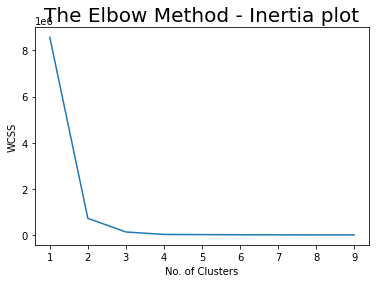

In [4]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data[[Column.KONFIRMASI, Column.SEMBUH]])
    sse.append(kmeans.inertia_)

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(data[[Column.KONFIRMASI, Column.SEMBUH]])
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
kmeans = KMeans(
    n_clusters=3,
)

pred = kmeans.fit_predict(data[[Column.KONFIRMASI, Column.SEMBUH]])

data['K-means'] = pred

In [6]:
data

,provinsi,konfirmasi,sembuh,K-means
0,DKI Jakarta,3032,234,1
1,Jawa Barat,696,45,2
2,Jawa Timur,590,98,2
3,Sulawesi Selatan,370,43,2
4,Jawa Tengah,349,51,2
5,Banten,324,9,2
6,Bali,135,38,0
7,Papua,107,18,0
8,Kalimantan Selatan,96,6,0
9,Sumatera Selatan,89,9,0
